In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn as sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [69]:
# Loading data
users = pd.read_csv('ml-1m/users.dat', sep='::',
                    names=['user_id', 'gender', 'age_group', 'occupation', 'zip'])

ratings = pd.read_csv('ml-1m/ratings.dat', sep='::',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

movies = pd.read_csv('ml-1m/movies.dat', sep='::',
                    names=['movie_id', 'title', 'genere'])

## Merging dataframes
ratings_users = pd.merge(ratings, users, on='user_id')
ratings_users_movies = pd.merge(ratings_users, movies, on='movie_id')

## Ratings per user
ratings_per_user = ratings_users_movies.groupby(['user_id']).size().reset_index(name='no_reviews')
ratings_per_user_over_200 = ratings_per_user.copy()
ratings_per_user_over_200 = ratings_per_user_over_200[ratings_per_user_over_200['no_reviews'] > 200]

<ipython-input-69-5475b2b539f0>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('ml-1m/users.dat', sep='::',
<ipython-input-69-5475b2b539f0>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('ml-1m/ratings.dat', sep='::',
<ipython-input-69-5475b2b539f0>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('ml-1m/movies.dat', sep='::',


In [70]:
## Filtering main df
ratings_users_movies_filtered = ratings_users_movies.copy()
ratings_users_movies_filtered = ratings_users_movies_filtered[ratings_users_movies_filtered['user_id'].isin(ratings_per_user_over_200['user_id'])]
ratings_users_movies_filtered = ratings_users_movies_filtered.sort_values(by = 'user_id')
ratings_users_movies_filtered = ratings_users_movies_filtered.replace({'rating': {1: 0, 2: 0, 3: 0, 4: 1, 5: 1}})
ratings_users_movies_filtered = ratings_users_movies_filtered.replace({'age_group': {1: 9}})
ratings_users_movies_filtered = ratings_users_movies_filtered.drop(['timestamp', 'zip', 'movie_id'], axis = 1)

In [71]:
## gender dummy variable - females
conditionsF = [
    (ratings_users_movies_filtered['gender'] == 'F'),
    (ratings_users_movies_filtered['gender'] != 'F')
   ]

valuesF = [1, 0]

ratings_users_movies_filtered['female'] = np.select(conditionsF, valuesF)

## gender dummy variable - males
conditionsM = [
    (ratings_users_movies_filtered['gender'] == 'M'),
    (ratings_users_movies_filtered['gender'] != 'M')
   ]

valuesM = [1, 0]

ratings_users_movies_filtered['male'] = np.select(conditionsM, valuesM)

In [72]:
## Generating ocupation dummies

for i in list(range(0,21)):

    #print(i)

    conditionsProf = [
    (ratings_users_movies_filtered['occupation'] == i),
    (ratings_users_movies_filtered['occupation'] != i)
   ]

    valuesProf = [1, 0]
    col_name = str('occupation_' + str(i))

    ratings_users_movies_filtered[col_name] = np.select(conditionsProf, valuesProf)

In [73]:
## Generating genere dummies
for i in ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy','Film-Noir','Horror','Musical','Mystery',
          'Romance','Sci-Fi', 'Thriller','War',]:

    print("Generating dummy variables for genere: ")
    print(i)
    col_name = str('genere_' + str(i))
    col_name = col_name.replace("'","")
    col_name = col_name.replace("-","")



    ratings_users_movies_filtered[col_name] = ratings_users_movies_filtered.apply(lambda df: i in df.genere.split("|"), axis=1)
    ratings_users_movies_filtered = ratings_users_movies_filtered.replace({col_name: {True: 1, False: 0}})


Generating dummy variables for genere: 
Action
Generating dummy variables for genere: 
Adventure
Generating dummy variables for genere: 
Animation
Generating dummy variables for genere: 
Children's
Generating dummy variables for genere: 
Comedy
Generating dummy variables for genere: 
Crime
Generating dummy variables for genere: 
Documentary
Generating dummy variables for genere: 
Drama
Generating dummy variables for genere: 
Fantasy
Generating dummy variables for genere: 
Film-Noir
Generating dummy variables for genere: 
Horror
Generating dummy variables for genere: 
Musical
Generating dummy variables for genere: 
Mystery
Generating dummy variables for genere: 
Romance
Generating dummy variables for genere: 
Sci-Fi
Generating dummy variables for genere: 
Thriller
Generating dummy variables for genere: 
War


In [74]:
training_data = ratings_users_movies_filtered.copy()
test_data = ratings_users_movies_filtered.copy()

training_data = training_data[training_data['user_id'] > 1000]
test_data = test_data[test_data['user_id'] <= 1000]


data_cols_input = ['age_group','female','male',
                   'occupation_0',
                   'occupation_1',
                   'occupation_2',
                   'occupation_3',
                   'occupation_4',
                   'occupation_5',
                   'occupation_6',
                   'occupation_7',
                   'occupation_8',
                   'occupation_9',
                   'occupation_10',
                   'occupation_11',
                   'occupation_12',
                   'occupation_13',
                   'occupation_14',
                   'occupation_15',
                   'occupation_16',
                   'occupation_17',
                   'occupation_18',
                   'occupation_19',
                   'occupation_20',
                   'genere_Action',
                   'genere_Adventure',
                   'genere_Animation',
                   'genere_Childrens',
                   'genere_Comedy',
                   'genere_Crime',
                   'genere_Documentary',
                   'genere_Drama',
                   'genere_Fantasy',
                   'genere_FilmNoir',
                   'genere_Horror',
                   'genere_Musical',
                   'genere_Mystery',
                   'genere_Romance',
                   'genere_SciFi',
                   'genere_Thriller',
                   'genere_War'
                   ]
y_train = training_data.copy()
y_train = y_train['rating']
X_train = training_data.copy()
X_train = X_train[data_cols_input]


y_test = test_data.copy()
y_test = y_test['rating']
X_test = test_data.copy()
X_test = X_test[data_cols_input]


y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [75]:
## Part 2
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("Samples and features in training data: ")
print(X_train.shape)
print("Samples in training data: ")
print(y_train.shape)

print("Samples and features in test data: ")
print(X_test.shape)
print("Samples in test data: ")
print(y_test.shape)
print("// -- //")


print("Best constant prediction for test dataset is: ")
print(np.sum(y_test) / (y_test.shape[0]))
print("// -- //")
print("Best constant prediction for train dataset is: ")
print(np.sum(y_train) / (y_train.shape[0]))
print("// -- //")

Samples and features in training data: 
(559188, 41)
Samples in training data: 
(559188,)
Samples and features in test data: 
(95593, 41)
Samples in test data: 
(95593,)
// -- //
Best constant prediction for test dataset is: 
0.5356249934618643
// -- //
Best constant prediction for train dataset is: 
0.5422863151569777
// -- //


In [76]:
# Performance with default parameters - linear kernel

linearDefault = sklearn.svm.LinearSVC(C = 1)
linearDefault.fit(X_train, y_train)

linearDefaultYhat_train = linearDefault.predict(X_train)
linearDefaultYhat_test = linearDefault.predict(X_test)

linearDefaultACS_train = sklearn.metrics.accuracy_score(y_train, linearDefaultYhat_train)
linearDefaultACS_test = sklearn.metrics.accuracy_score(y_test, linearDefaultYhat_test)

print('linearDefaultACS_train: ', linearDefaultACS_train)
print('linearDefaultACS_test: ', linearDefaultACS_test)


linearDefaultACS_train:  0.5751589805217565
linearDefaultACS_test:  0.5603234546462607


In [77]:
## Cross validation
C = np.logspace(0, 4, 5)
C = np.append(C, [1])

combination = []
cvResults = []



for c in C: 
    model = sklearn.svm.LinearSVC(C = c)
    try: 
        accuraccy = np.mean(model_selection.cross_val_score(model,
                                                    X_train, 
                                                    y_train, 
                                                    cv=5,        
                                                    scoring='accuracy'))

        combination.append([c])
        cvResults.append(accuraccy)
        print("result for " + str(c) + ": ")
        print(accuraccy)
        print("=====")

    except ValueError:

        print("Combination [", [c], "] does not wokr!")
            
            
        

indexBest = np.argmax(cvResults)
print('Best set of hyperparameters is: ', combination[indexBest])



## linear kernel best CV

linearCV = sklearn.svm.LinearSVC(C = combination[indexBest][0])

linearCV.fit(X_train, y_train)

linearCVYhat_train = linearCV.predict(X_train)
linearCVYhat_test = linearCV.predict(X_test)

linearCVACS_train = sklearn.metrics.accuracy_score(y_train, linearCVYhat_train)
linearCVACS_test = sklearn.metrics.accuracy_score(y_test, linearCVYhat_test)

print('Best model with CV selected hyperparameters is: ')
print('linearCV_ACS_train: ', linearCVACS_train)
print('linearCV_ACS_test: ', linearCVACS_test)




result for 1.0: 
0.5691735118811159
=====


C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

result for 10.0: 
0.569101979475929
=====


C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

result for 100.0: 
0.5470002839961705
=====


C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

result for 1000.0: 
0.5266833728771991
=====


C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mait\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

result for 10000.0: 
0.5344052125984167
=====
result for 1.0: 
0.5691735118811159
=====
Best set of hyperparameters is:  [1.0]
Best model with CV selected hyperparameters is: 
linearCV_ACS_train:  0.5751589805217565
linearCV_ACS_test:  0.5603234546462607


In [78]:
print(combination)
print(cvResults)

[[1.0], [10.0], [100.0], [1000.0], [10000.0], [1.0]]
[0.5691735118811159, 0.569101979475929, 0.5470002839961705, 0.5266833728771991, 0.5344052125984167, 0.5691735118811159]


In [79]:
# Precision - recall curve for best linear SVM model
linearBest = sklearn.svm.LinearSVC(C = 1)
linearBest.fit(X_train, y_train)



LinearSVC(C=1)

In [80]:
# Performance with default parameters
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5760149801763728

In [86]:
# Cross-validation to find best parameter value hidden layer size
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

MLP_default_test = clf.score(X_test, y_test)
MLP_default_train = clf.score(X_train, y_train)


print('MLP with default hyperparameters score on train dataset: ', MLP_default_train)
print('MLP with default hyperparameters score on test dataset: ', MLP_default_test)



## Cross validation
C = [10, 50, 100, 150, 200, 250]



combination = []
cvResults = []



for c in C: 
        model = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = c)
        try: 
            accuraccy = np.mean(model_selection.cross_val_score(model,
                                                    X_train, 
                                                    y_train, 
                                                    cv=5, 
                                                    scoring='accuracy'))

            combination.append([c])
            cvResults.append(accuraccy)

        except ValueError:

            print("Combination [", [c], "] does not work!")
            
            
        

indexBest = np.argmax(cvResults)
print('Best set of hyperparameters is: ', combination[indexBest])



## MLP best CV

#linearCV = sklearn.svm.LinearSVC(C = combination[indexBest][0])

clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = combination[indexBest][0])
clf.fit(X_train, y_train)


MLP_Yhat_train = clf.predict(X_train)
MLP_Yhat_test = clf.predict(X_test)

MLP_ACS_train = sklearn.metrics.accuracy_score(y_train, MLP_Yhat_train)
MLP_ACS_test = sklearn.metrics.accuracy_score(y_test, MLP_Yhat_test)

print('Best model with CV selected hyperparameters is: ')
print('MLP_ACS_train: ', MLP_ACS_train)
print('MLP_ACS_test: ', MLP_ACS_test)

MLP with default hyperparameters score on train dataset:  0.6155604197514968
MLP with default hyperparameters score on test dataset:  0.5760149801763728
Best set of hyperparameters is:  [10]
Best model with CV selected hyperparameters is: 
MLP_ACS_train:  0.5969709650421683
MLP_ACS_test:  0.5793311225717365


In [82]:
# Performance with best parameters
clfBest = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = 10).fit(X_train, y_train)

clfBest.score(X_test, y_test)
clfBest.score(X_train, y_train)

0.5969709650421683

In [83]:
# precision-recall curves for SVM

# Helper function
def precisionRecallComp(y_true, y_hat):
        
    trueP = 0
    falseP = 0
    falseN = 0

    for i, element in enumerate(y_true): 
        if y_true[i]==y_hat[i]==1:
           trueP += 1
        if y_hat[i]==1 and y_true[i]!=y_hat[i]:
           falseP += 1
        if y_hat[i]==0 and y_test[i]!=y_hat[i]:
           falseN += 1
    

    if (trueP + falseP) != 0:
        precision = trueP / (trueP + falseP)
    else:
        precision = 1
    
    if (trueP + falseN) != 0:
        recall = trueP / (trueP + falseN)
    else:
        recall = 1

    return precision, recall


# Best SVM linear model computations
y_score = linearBest.decision_function(X_test)

precisions = []
recalls = []

prediction_tresholds = np.linspace(0,1,num=10)


for i in prediction_tresholds:
    
    y_test_preds = []
    
    for ii in y_score:
        if ii > i:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = precisionRecallComp(y_test, y_test_preds)
        
    precisions.append(precision)
    recalls.append(recall)

In [84]:
# precision-recall curves for MLP
y_score = clfBest.predict_proba(X_test)
y_score = [x[1] for x in y_score]


precisionsMLP = []
recallsMLP = []

prediction_tresholds = np.linspace(0,1,num=10)


for i in prediction_tresholds:
    
    y_test_preds = []
    
    for ii in y_score:
        if ii > i:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = precisionRecallComp(y_test, y_test_preds)
        
    precisionsMLP.append(precision)
    recallsMLP.append(recall)
    

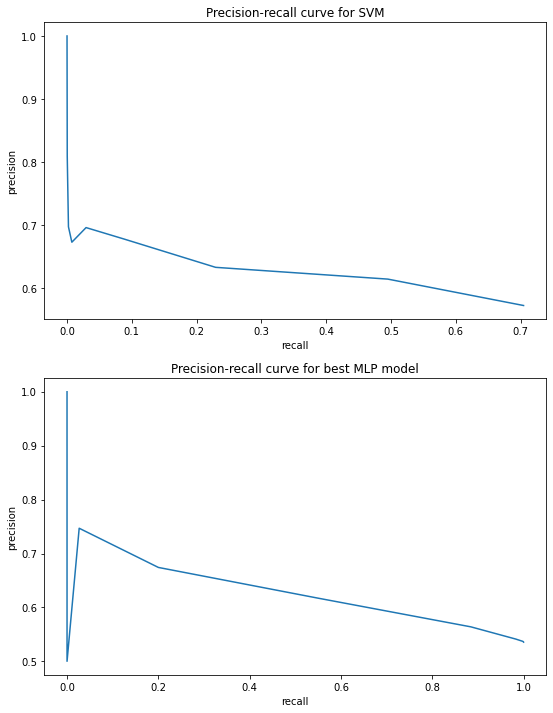

In [85]:
plt.figure(figsize=(9, 12))
plt.figure(1)
plt.subplot(211)
plt.plot(recalls, precisions)  
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision-recall curve for SVM")
plt.subplot(212)
plt.plot(recallsMLP, precisionsMLP)  
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision-recall curve for best MLP model")
plt.show()

In [39]:
# Calculating area under the curve

def precisionRecallAreaCalculator(recallsArray, precisionsArray):
    
    area = 0
    
    for i, val in enumerate(recallsArray):
        if(i == 0):
            binArea = recallsArray[i] * precisionsArray[i]
        else: 
            binArea = (recallsArray[i] - recallsArray[i-1]) * precisionsArray[i]
            
        area += binArea
    
    return area


SVM_area = precisionRecallAreaCalculator(recalls, precisions)
MLP_area = precisionRecallAreaCalculator(recallsMLP, precisionsMLP)

print("Area under cuve for best linear SVM model: ")
print(SVM_area)
print("// --- //")

print("Area under cuve for best MLP model: ")
print(MLP_area)
print("// --- //")

array([0.42632041, 0.57367959])

array([0, 1], dtype=int64)